In [9]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/nishanthnagendran/Documents/UIC related/repos/fair-pedestrian-detection/scripts/notebooks


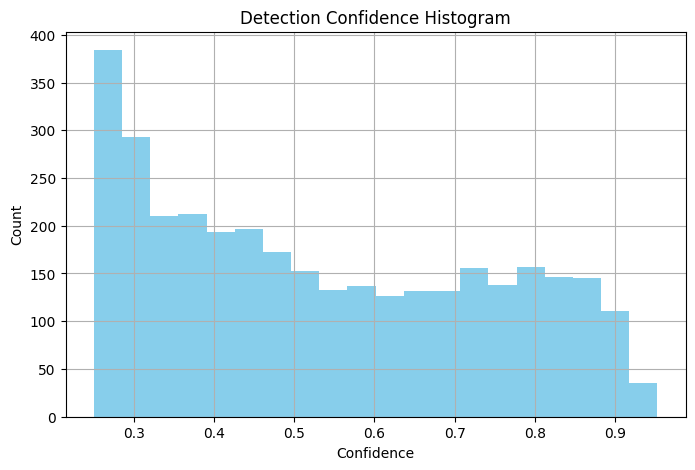

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../runs/detect/predict/predictions.csv")

# Quick test plot
plt.figure(figsize=(8, 5))
plt.hist(df['confidence'], bins=20, color='skyblue')
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.title('Detection Confidence Histogram')
plt.grid(True)
plt.show()


In [13]:
import pandas as pd

df = pd.read_csv("../../runs/detect/predict/predictions.csv")
print(df.columns)


Index(['image', 'height', 'confidence'], dtype='object')


                   image  height  confidence
0  c536c7e6-f9b2808f.jpg   28.60       0.619
1  c536c7e6-f9b2808f.jpg   25.34       0.285
2  c0e9b7c4-cd8b7249.jpg  222.39       0.887
3  c0e9b7c4-cd8b7249.jpg  123.33       0.855
4  c0e9b7c4-cd8b7249.jpg  103.46       0.776


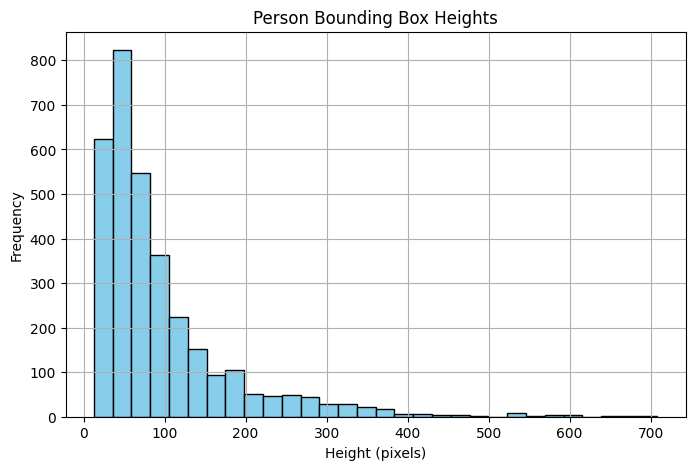

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../runs/detect/predict/predictions.csv")

# Optional: check a preview
print(df.head())

# Plot histogram of person heights
plt.figure(figsize=(8, 5))
plt.hist(df['height'], bins=30, color='skyblue', edgecolor='black')
plt.title("Person Bounding Box Heights")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


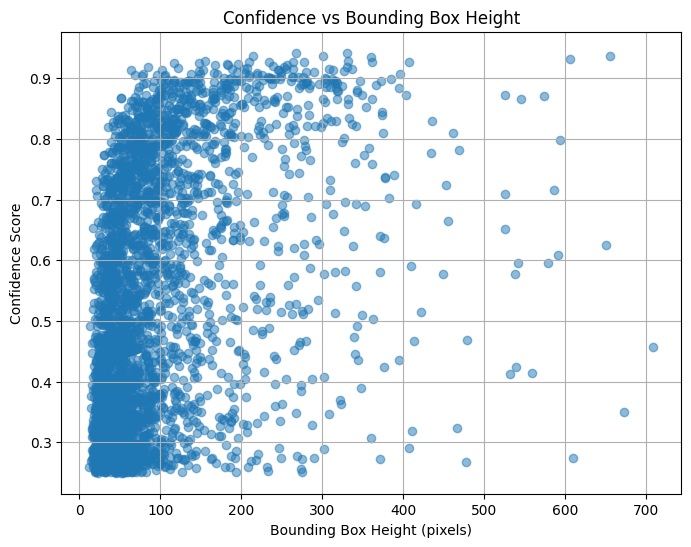

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load detection results
df = pd.read_csv("../../runs/detect/predict/predictions.csv")

# Plot Confidence vs Height
plt.figure(figsize=(8, 6))
plt.scatter(df['height'], df['confidence'], alpha=0.5)
plt.title("Confidence vs Bounding Box Height")
plt.xlabel("Bounding Box Height (pixels)")
plt.ylabel("Confidence Score")
plt.grid(True)
plt.show()


  height_group      mean  count
0        short  0.480955   2282
1         tall  0.657806    976


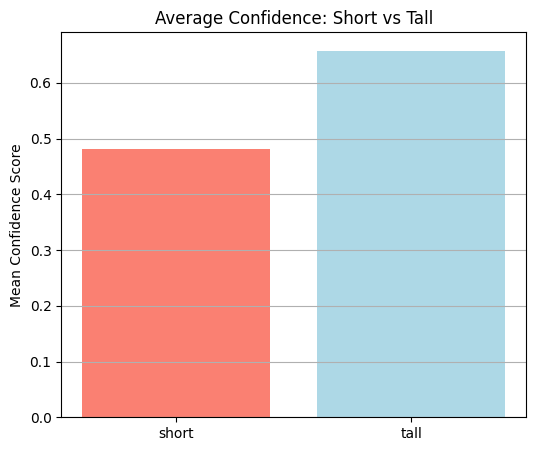

In [17]:
# Define short vs tall groups
def height_group(h):
    return 'short' if h < 100 else 'tall'

df['height_group'] = df['height'].apply(height_group)

# Group statistics
group_stats = df.groupby('height_group')['confidence'].agg(['mean', 'count']).reset_index()
print(group_stats)

# Optional: Bar plot for comparison
plt.figure(figsize=(6, 5))
plt.bar(group_stats['height_group'], group_stats['mean'], color=['salmon', 'lightblue'])
plt.title("Average Confidence: Short vs Tall")
plt.ylabel("Mean Confidence Score")
plt.grid(axis='y')
plt.show()


In [18]:
# Save group-wise stats
audit_dir = "../../runs/detect/audit/"
os.makedirs(audit_dir, exist_ok=True)

group_stats.to_csv(audit_dir + "height_confidence_summary.csv", index=False)

print(f"Saved audit summary to {audit_dir}height_confidence_summary.csv")


Saved audit summary to ../../runs/detect/audit/height_confidence_summary.csv
